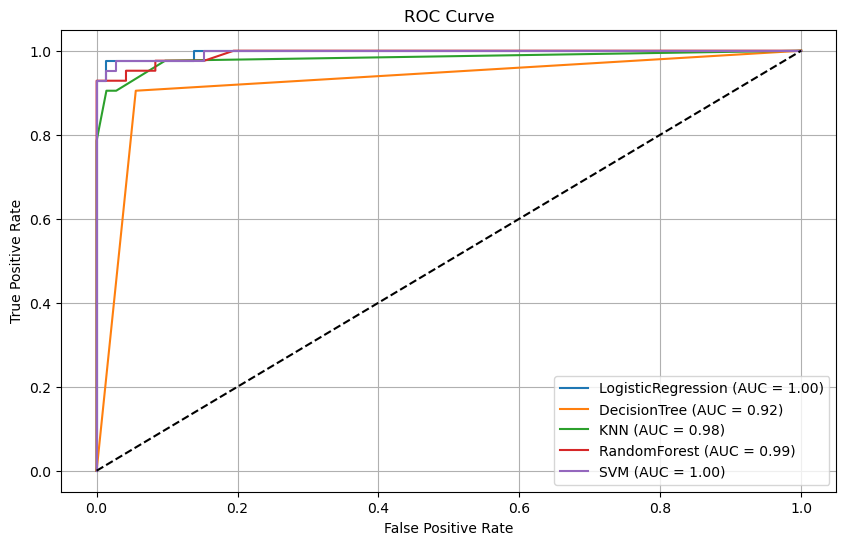


 Model Comprarison: 
                  Model  Accuracy  Precision    Recall  F1 Score       AUC
0  LogisticRegression  0.964912   0.975000  0.928571  0.951220  0.996032
1        DecisionTree  0.929825   0.904762  0.904762  0.904762  0.924603
2                 KNN  0.956140   0.974359  0.904762  0.938272  0.981647
3        RandomForest  0.973684   1.000000  0.928571  0.962963  0.992890
4                 SVM  0.973684   1.000000  0.928571  0.962963  0.995370


In [66]:
# Model Evaluation and ROC Curve Plotting
result = []
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    acc= accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    result.append([model_name, acc, prec, rec, f1, auc])

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

result_df = pd.DataFrame(result, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
print("\n Model Comprarison: \n ", result_df)

In [63]:
#Modeling the data and creating the model of the data
models ={ 
    "LogisticRegression": LogisticRegression(max_iter=500),
    "DecisionTree": DecisionTreeClassifier(random_state=42),   
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)
print("\n Models Trained and Predictions Made")


 Models Trained and Predictions Made


In [62]:
#Data Processing
label_encoder = LabelEncoder()
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])
#standardizing  features
scaler = StandardScaler()
X= scaler.fit_transform(df[numerical_features])
y = df['Diagnosis']
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data preprocessing completed successfully.") 
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape) 
print("Class Distribution in Training Set:\n", y_train.value_counts(normalize=True))

Data preprocessing completed successfully.
Training set shape:  (455, 30)
Testing set shape:  (114, 30)
Class Distribution in Training Set:
 Diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64


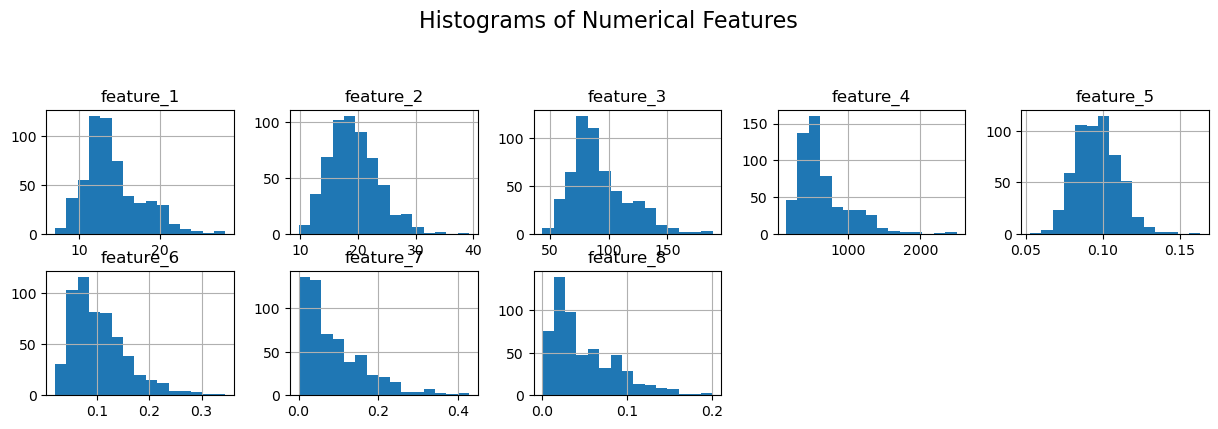

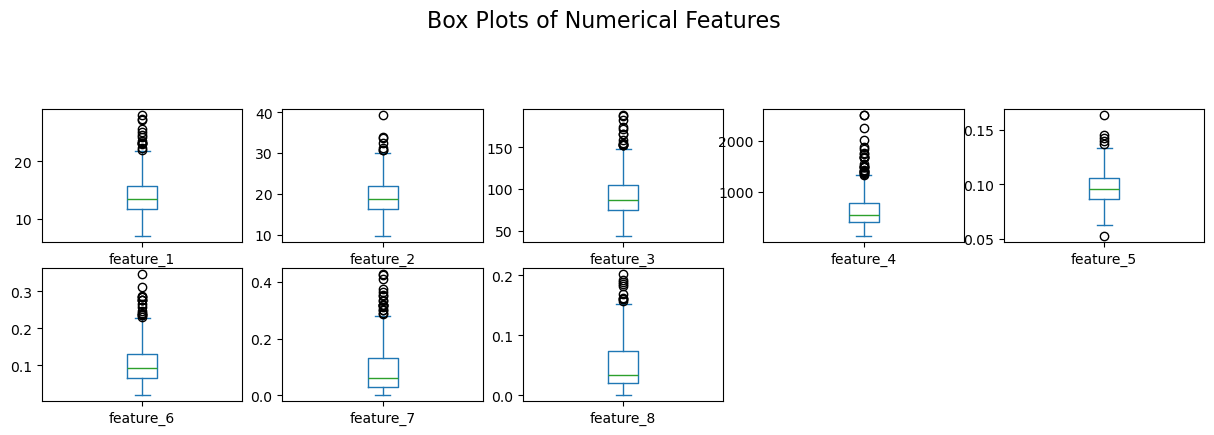

C:\Users\pfunz\AppData\Local\Temp\ipykernel_15500\2142883170.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='Set1')


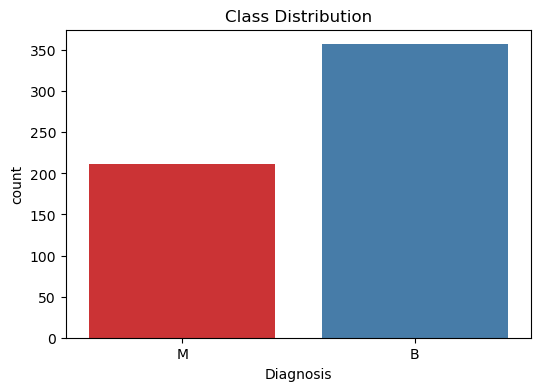

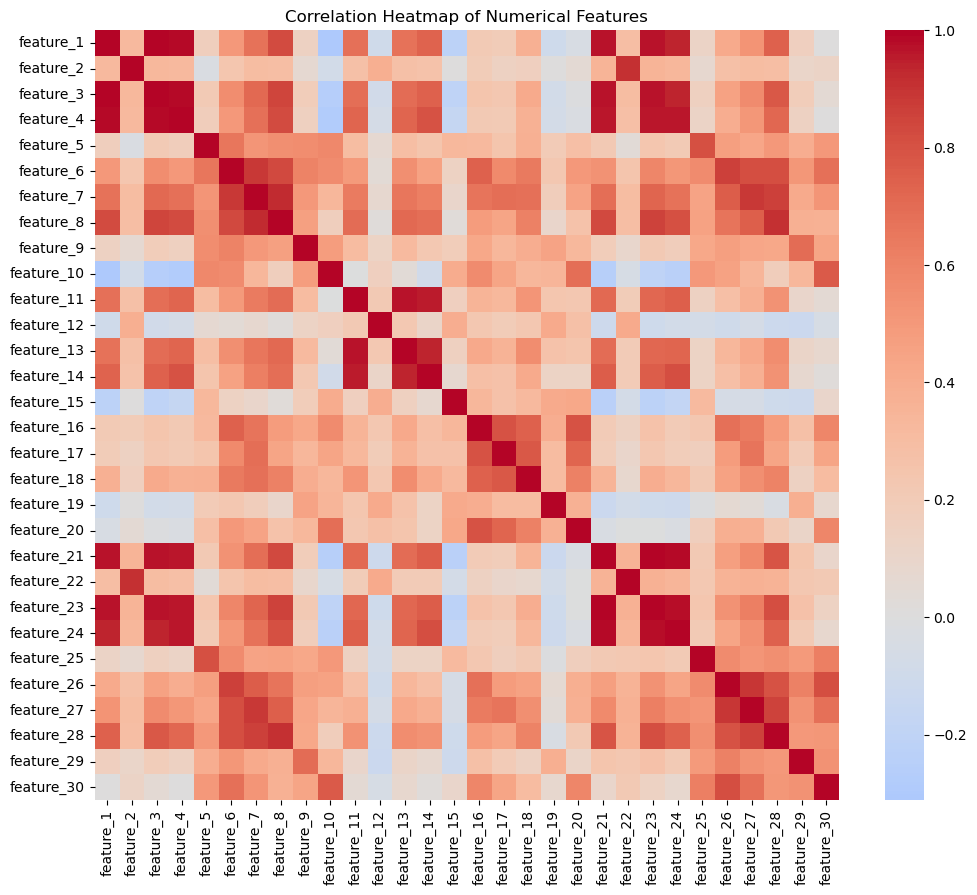

In [61]:
# data visualization

#Histograms for the numerical features
df[numerical_features[:8]].hist(bins=15, figsize=(15, 10), layout=(5, 5))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

#Box plots to visualize the distribution of numerical features
df[numerical_features[:8]].plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 10), title='Box Plots of Numerical Features')
plt.suptitle('Box Plots of Numerical Features', fontsize=16)
plt.show()

#bar plot for class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Diagnosis', data=df, palette='Set1')
plt.title('Class Distribution')
plt.show()

#Correlation heatmap
plt.figure(figsize=(12,10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')  
plt.show()

In [60]:
# Class Distribution and Descriptivre Statistics
class_distribution = df['Diagnosis'].value_counts(normalize=True)
print("Class Distribution:\n", class_distribution)
print("\nDescriptive Statistics:\n", df[numerical_features].describe().T)

Class Distribution:
 Diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

Descriptive Statistics:
             count        mean         std         min         25%         50%  \
feature_1   569.0   14.127292    3.524049    6.981000   11.700000   13.370000   
feature_2   569.0   19.289649    4.301036    9.710000   16.170000   18.840000   
feature_3   569.0   91.969033   24.298981   43.790000   75.170000   86.240000   
feature_4   569.0  654.889104  351.914129  143.500000  420.300000  551.100000   
feature_5   569.0    0.096360    0.014064    0.052630    0.086370    0.095870   
feature_6   569.0    0.104341    0.052813    0.019380    0.064920    0.092630   
feature_7   569.0    0.088799    0.079720    0.000000    0.029560    0.061540   
feature_8   569.0    0.048919    0.038803    0.000000    0.020310    0.033500   
feature_9   569.0    0.181162    0.027414    0.106000    0.161900    0.179200   
feature_10  569.0    0.062798    0.007060    0.049960    0.057700    0.0

In [59]:
#  creating the features
categorical_features =  df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()
print("Categorical Features: ", categorical_features)
print("Numerical Features : ", len(numerical_features))

Categorical Features:  ['Diagnosis']
Numerical Features :  30


In [58]:
#Handling any missing values in the dataset
print("Missing Values in each column:\n", df.isnull().sum())
print("\nTotal Missing Values in the dataset:", df.isnull().sum().sum())


Missing Values in each column:
 Diagnosis     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64

Total Missing Values in the dataset: 0


In [57]:
# the overview of the dataset
print("Dataset Shape : ", df.shape )
print("\nFeatures : ", df.columns.tolist())
print("\nTarget Variable : ", "Diagnosis")


Dataset Shape :  (569, 31)

Features :  ['Diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30']

Target Variable :  Diagnosis


In [56]:
# loading the dataset  and removing the ID column 
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
df=pd.read_csv('wdbc.data',header=None, names=columns)
df.drop('ID', axis=1, inplace=True)
df

,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [55]:
#Importing necessary libraries  for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
